In [1]:
import pickle
import matplotlib.pyplot as plt
from matplotlib_venn import venn3_unweighted

In [2]:
# Load the list from the pickle file
with open('../../XGboost/XGboost40.pkl', 'rb') as f:
    XGboost40 = pickle.load(f)

print(XGboost40)

['Creatinine_max', 'Renal dialysis status', 'Urea_Nitrogen_max', 'Creatinine_mean', 'Creatinine_median', 'Creatinine_last', 'Urea_Nitrogen_last', 'Potassium_max', 'Bilirubin,_Total_mean', 'Creatinine_min', 'Hemoglobin_min_y', 'Hemoglobin_max_y', 'Creatinine,_Urine_min', 'White_Blood_Cells_min', 'Unspecified essential hypertension', 'Neutrophils_min', 'Sodium_min', 'Protein/Creatinine_Ratio_mean', 'Congestive heart failure, unspecified', 'Uric_Acid_min', 'Neutrophils_max', 'MCHC_min', 'White_Blood_Cells_last', 'Neutrophils_last', 'Orthostatic hypotension', 'Urea_Nitrogen_mean', 'Platelet_Count_min', 'Protein,_Total_last', 'Basophils_mean', 'MCV_last', 'Protein,_Total_max', 'Urea_Nitrogen_median', 'Cholesterol,_LDL,_Calculated_max', 'Total_Protein,_Urine_max', 'Monocytes_mean', 'hadm_id_first_CKD', 'Platelet_Count_last', 'MCH_min', 'Hemoglobin_last_y', 'Bilirubin,_Total_max']


In [3]:
# Load the list from the pickle file
with open('../../ResNet/ResNet40.pkl', 'rb') as f:
    ResNet40 = pickle.load(f)

print(ResNet40)

['Acute kidney failure, unspecified', 'Creatinine_last', 'Other and unspecified hyperlipidemia', 'Renal dialysis status', 'Anemia, unspecified', 'Chloride_max', 'MCHC_min', 'hadm_id_last', 'Peripheral vascular disease, unspecified', 'MCHC_max', 'Neutrophils_max', 'Creatinine_max', 'Creatinine_first', 'Unspecified essential hypertension', 'Urea_Nitrogen_max', 'Sodium_min', 'Personal history of tobacco use', 'Monocytes_min', 'Percutaneous transluminal coronary angioplasty status', 'Pneumonia, organism unspecified', 'Long-term (current) use of anticoagulants', 'Creatinine_mean', 'admission_type_EW EMER.', 'Constipation, unspecified', 'Lymphocytes_min', 'Urea_Nitrogen_median', 'Potassium_max', 'Neutrophils_min', 'Old myocardial infarction', 'Sodium_max', 'Hyperpotassemia', 'Coronary atherosclerosis of native coronary artery', 'Eosinophils_min', 'Chronic diastolic heart failure', 'Urea_Nitrogen_mean', 'MCH_max', 'Personal history of transient ischemic attack (TIA), and cerebral infarction w

In [4]:
# Load the list from the pickle file
with open('../../FCNN/FCNN40.pkl', 'rb') as f:
    FCNN40 = pickle.load(f)

print(FCNN40)

['Creatinine_last', 'Other and unspecified hyperlipidemia', 'race_WHITE', 'Renal dialysis status', 'Chloride_max', 'Creatinine_first', 'Acute kidney failure, unspecified', 'Urea_Nitrogen_max', 'Creatinine_max', 'Urea_Nitrogen_mean', 'Anemia, unspecified', 'Esophageal reflux', 'Urea_Nitrogen_median', 'MCHC_min', 'Sodium_max', 'Potassium_max', 'admission_type_EW EMER.', 'Creatinine_mean', 'Neutrophils_min', 'admission_location_EMERGENCY ROOM', 'Sodium_min', 'Personal history of tobacco use', 'White_Blood_Cells_min', 'Unspecified essential hypertension', 'Acute on chronic diastolic heart failure', 'Subendocardial infarction, initial episode of care', 'Neutrophils_max', 'Personal history of transient ischemic attack (TIA), and cerebral infarction without residual deficits', 'Peripheral vascular disease, unspecified', 'race_BLACK/AFRICAN AMERICAN', 'Osteoporosis, unspecified', 'admit_provider_id_P38TI6', 'hadm_id_last', 'Creatinine_min', 'MCHC_max', 'Urea_Nitrogen_last', 'admit_provider_id_

C:\Users\zdana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib_venn\_util.py:62: UserWarning: venn3_unweighted is deprecated. Use venn3 with the appropriate layout_algorithm instead.
  warnings.warn(


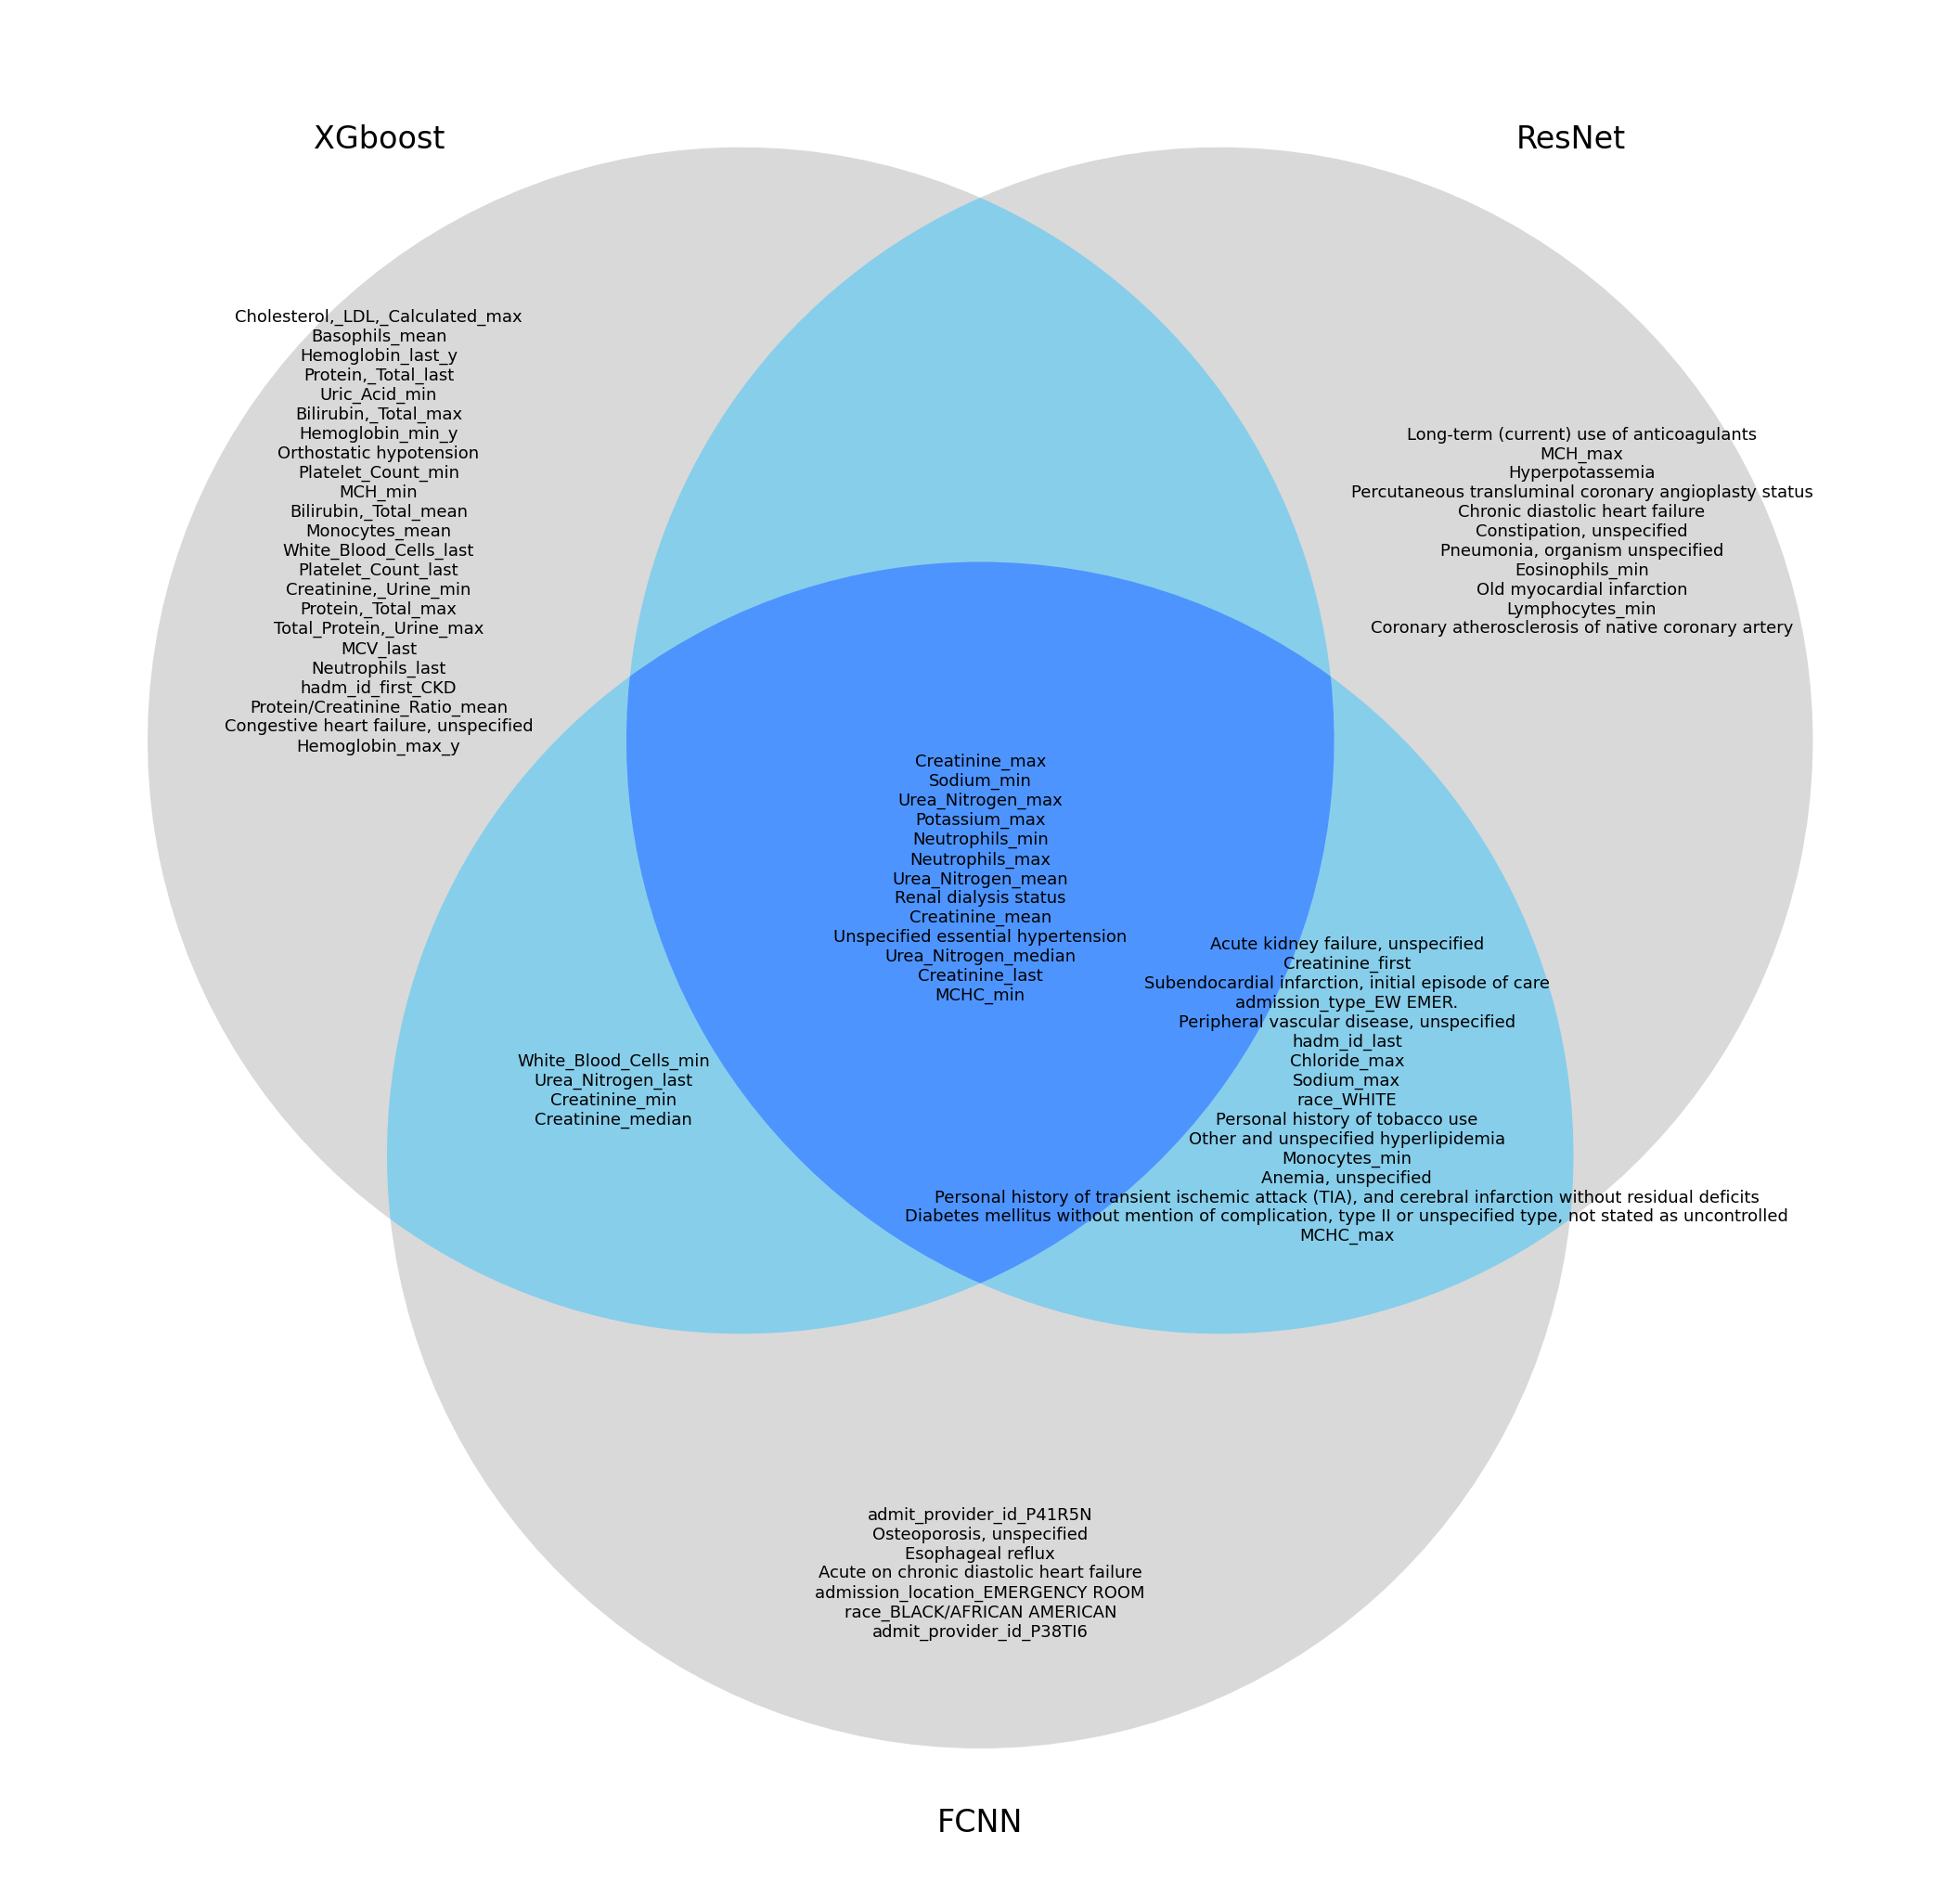

In [5]:
# Convert lists to sets
set_XGboost = set(XGboost40)
set_ResNet = set(ResNet40)
set_FCNN = set(FCNN40)

# Create a dictionary to store the string elements for each region
venn_labels = {
    '100': '\n'.join(set_XGboost - set_ResNet - set_FCNN),  # Elements only in set_XGboost
    '010': '\n'.join(set_ResNet - set_XGboost - set_FCNN),  # Elements only in set_ResNet
    '001': '\n'.join(set_FCNN - set_XGboost - set_ResNet),  # Elements only in set_FCNN
    '110': '\n'.join(set_XGboost & set_ResNet - set_FCNN),  # Elements in set_XGboost and set_ResNet
    '101': '\n'.join(set_XGboost & set_FCNN - set_ResNet),  # Elements in set_XGboost and set_FCNN
    '011': '\n'.join(set_ResNet & set_FCNN - set_XGboost),  # Elements in set_ResNet and set_FCNN
    '111': '\n'.join(set_XGboost & set_ResNet & set_FCNN)   # Elements in all three sets
}

# Adjust the figure size (width, height)
plt.figure(figsize=(27, 27))

# Create a Venn diagram without counts and customize the gray background
venn = venn3_unweighted([set_XGboost, set_ResNet, set_FCNN], ('XGboost', 'ResNet', 'FCNN'))

# Customize the colors for the patches with slightly darker shades for overlaps
shades = {
    '100': '#d9d9d9',  # Light gray for non-overlapping region of XGboost
    '010': '#d9d9d9',  # Light gray for non-overlapping region of ResNet
    '001': '#d9d9d9',  # Light gray for non-overlapping region of FCNN
    '110': 'skyblue',  # Light blue for XGboost & ResNet overlap
    '101': 'skyblue',  # Light blue for XGboost & FCNN overlap
    '011': 'skyblue',  # Light blue for ResNet & FCNN overlap
    '111': '#4d94ff'   # Darker blue for all three overlapping
}

for patch_id, color in shades.items():
    patch = venn.get_patch_by_id(patch_id)
    if patch:  # Ensure the patch exists
        patch.set_color(color)
        patch.set_alpha(1)  # Set full opacity for base color

# Update the labels with string elements and decrease the font size
for idx, label in venn_labels.items():
    label_obj = venn.get_label_by_id(idx)
    if label_obj:  # Ensure the label exists
        label_obj.set_text(label)
        label_obj.set_fontsize(13)  # Set the font size to a smaller value

# Increase the font size of the main labels (XGboost, ResNet, FCNN)
for text in venn.set_labels:
    text.set_fontsize(24)

# Save the plot as a PNG file
plt.savefig("TripleVennFeatures.png", format="png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()